This notebook helps find models in Biomodels that have hospitalization inside them - helping for giving ideas on how to write new compartments representing hospitalization into existing models (such as the one from Scenario 1).

What you need to do to get a useful hospitalization compartment:

- Make sure that infected population is stratified to symptomatic/asymptomatic
- Note that asymptomatic population will not get hospitalized
- Create new transitions from symptomatic infected to hospitalized. This runs in parallel to symptomatic infected going to recovered (no need to delete anything). Then, make a transition from hospitalized to recovered.
- If you're in a model that has death, then you also have to include another parallel edge to the dead node.

In [29]:
from mira.sources.biomodels import query_biomodels, get_template_model
from tqdm.auto import tqdm
from tabulate import tabulate
from textwrap import shorten
from mira.examples.sir import svir
from mira.examples.concepts import hospitalized, infected_symptomatic, infected_asymptomatic, recovered
from mira.modeling.viz import GraphicalModel
from mira.metamodel import *
from mira.metamodel.templates import TemplateModelDelta
from IPython.display import Image

In [30]:
from mira.metamodel.templates import get_dkg_refinement_closure
refinement_fun = get_dkg_refinement_closure().is_ontological_child

In [2]:
models_res = query_biomodels("submitter_keywords:COVID-19", limit=30)

In [3]:
rows = []
for model_data in tqdm(models_res):
    try:
        template_model = get_template_model(model_data["id"])
    except Exception:
        pass
    rows.append((
        model_data["id"], model_data["name"], template_model,
    ))

  0%|          | 0/28 [00:00<?, ?it/s]

In [4]:
len(rows)

28

In [5]:
seen = set()
res_rows = []
for m_id, m_name, m in rows:
    if m_id.startswith('BIOMD'):
        for template in m.templates:
            for concept in template.get_concepts():
                if "hosp" in concept.name.lower():
                    if m_id not in seen:
                        seen.add(m_id)
                        res_rows.append((
                            m_id, shorten(m_name, 40), len(m.templates),
                            concept.get_curie_str(), shorten(concept.name, 30)
                        ))
                    
print(tabulate(
    res_rows, 
    tablefmt="github", 
    headers=["model_id", "model_title", "model_size", "compartment_curie", "compartment_label"],
))

| model_id        | model_title                              |   model_size | compartment_curie   | compartment_label   |
|-----------------|------------------------------------------|--------------|---------------------|---------------------|
| BIOMD0000000960 | SEIAHRD model of transmission [...]      |           10 | ido:0000511         | Hospitalized        |
| BIOMD0000000971 | Estimation of transmission risk of [...] |           13 | ido:0000511         | Hospitalised        |
| BIOMD0000000981 | risk estimation and prediction of [...]  |           15 | ido:0000511         | Hospitalised        |
| BIOMD0000000972 | Estimation of transmission risk of [...] |           13 | ido:0000511         | Hospitalised        |
| BIOMD0000000958 | early-stage transmission dynamics [...]  |           12 | ncit:C171133        | Hospitalised        |
| BIOMD0000000969 | SIHRD spatiotemporal model of [...]      |           32 | ncit:C25179         | [...]               |


In [18]:
m1 = next(x for i, _, x in rows if i == "BIOMD0000000960")
m2 = next(x for i, _, x in rows if i == "BIOMD0000000971")
m3 = next(x for i, _, x in rows if i == "BIOMD0000000958")

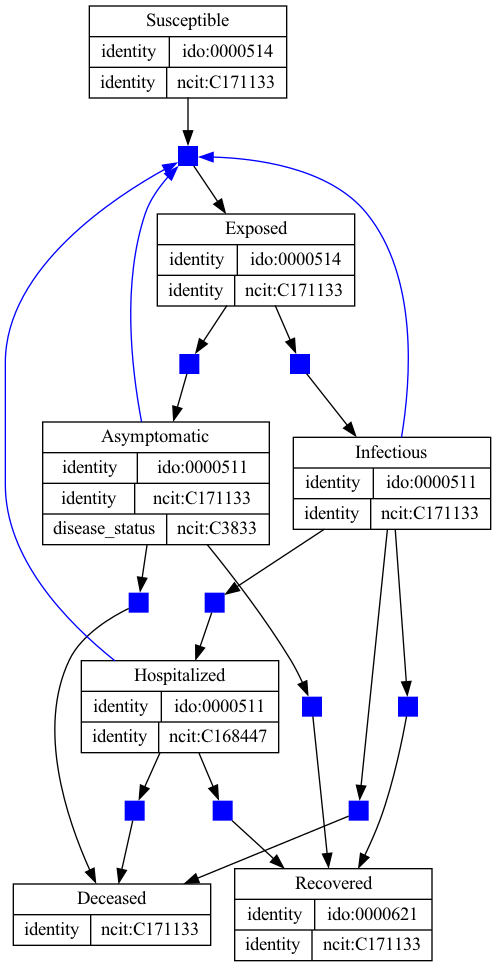

In [19]:
GraphicalModel.for_jupyter(m1, width="30%")

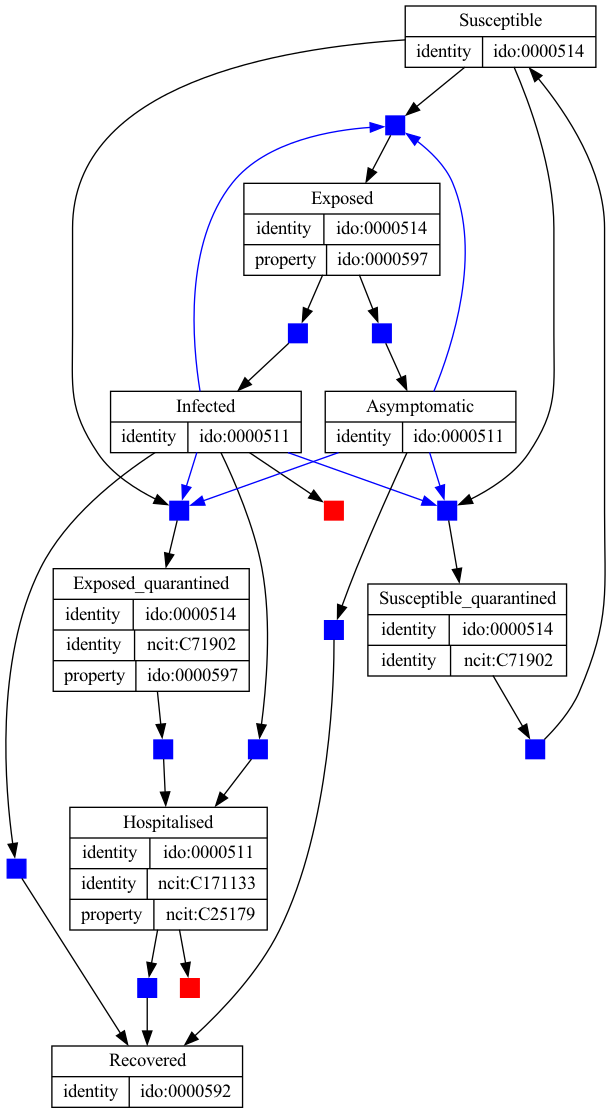

In [20]:
GraphicalModel.for_jupyter(m2, width="30%")

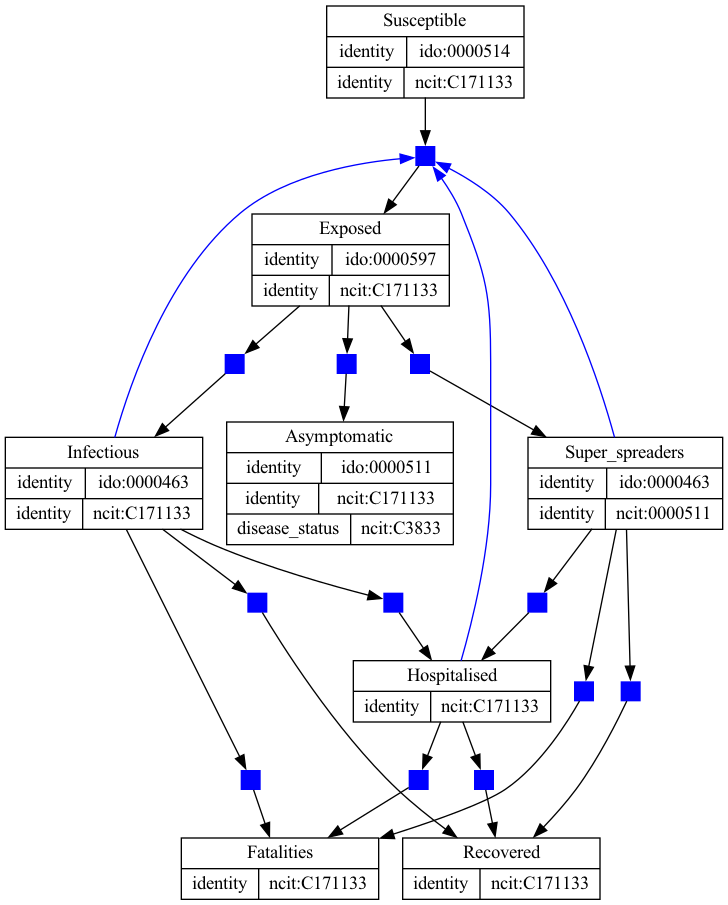

In [21]:
GraphicalModel.for_jupyter(m3, width="30%")

In [31]:
# Add the hospitalized node

svihr = svir.add_transition(infected_symptomatic, hospitalized)
svihr = svihr.add_transition(infected_asymptomatic, recovered)
svihr = svihr.add_transition(hospitalized, recovered)

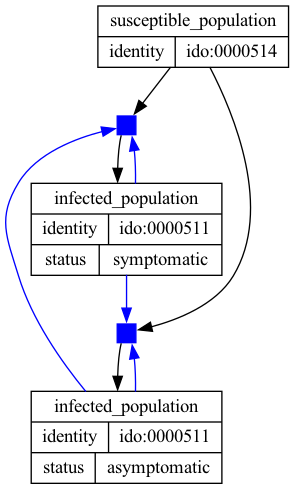

In [26]:
GraphicalModel.for_jupyter(svir, width="20%")

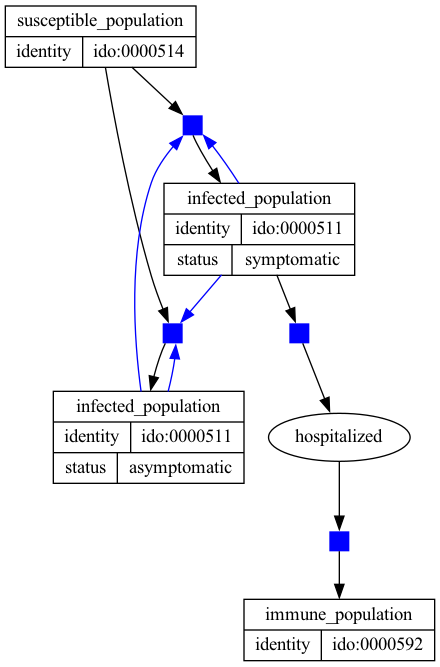

In [27]:
GraphicalModel.for_jupyter(svihr, width="20%")